In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
dataset = pd.read_csv("E://LP VI//dl//GOOGL.csv")
data = dataset[['Close']].values.astype(float)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, scaled_data, test_size=0.2, random_state=42)

# Reshape input data to be 3-dimensional (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Model Architecture
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

# Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


# Prediction
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE) from MSE
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


C:\Users\ABHIJIT KHULE\AppData\Local\Temp\ipykernel_9560\707442487.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd





Epoch 1/10

111/111 [==============================] - 4s 4ms/step - loss: 0.0407
Epoch 2/10
111/111 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 3/10
111/111 [==============================] - 0s 3ms/step - loss: 6.9893e-04
Epoch 4/10
111/111 [==============================] - 0s 3ms/step - loss: 8.1133e-05
Epoch 5/10
111/111 [==============================] - 0s 3ms/step - loss: 7.2937e-05
Epoch 6/10
111/111 [==============================] - 0s 3ms/step - loss: 6.5651e-05
Epoch 7/10
111/111 [==============================] - 0s 3ms/step - loss: 5.7297e-05
Epoch 8/10
111/111 [==============================] - 0s 3ms/step - loss: 4.9658e-05
Epoch 9/10
111/111 [==============================] - 0s 4ms/step - loss: 4.2008e-05
Epoch 10/10
28/28 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 3.108911000256466e-05
Root Mean Squared Error (RMSE): 0.00557576093484689


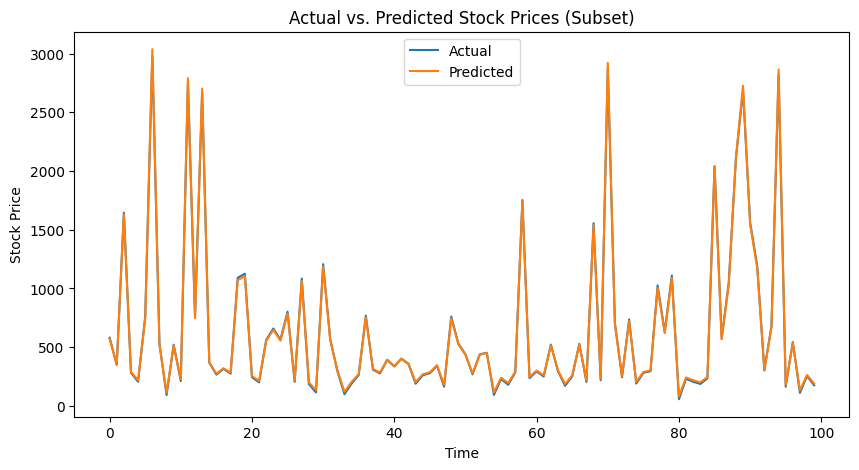

In [8]:
import matplotlib.pyplot as plt

# Select a subset of data to plot (e.g., first 100 data points)
subset_size = 100
y_test_subset = y_test_inv[:subset_size]
predictions_subset = predictions_inv[:subset_size]

# Plot actual vs. predicted stock prices for the subset
plt.figure(figsize=(10, 5))
plt.plot(y_test_subset, label='Actual')
plt.plot(predictions_subset, label='Predicted')
plt.title('Actual vs. Predicted Stock Prices (Subset)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




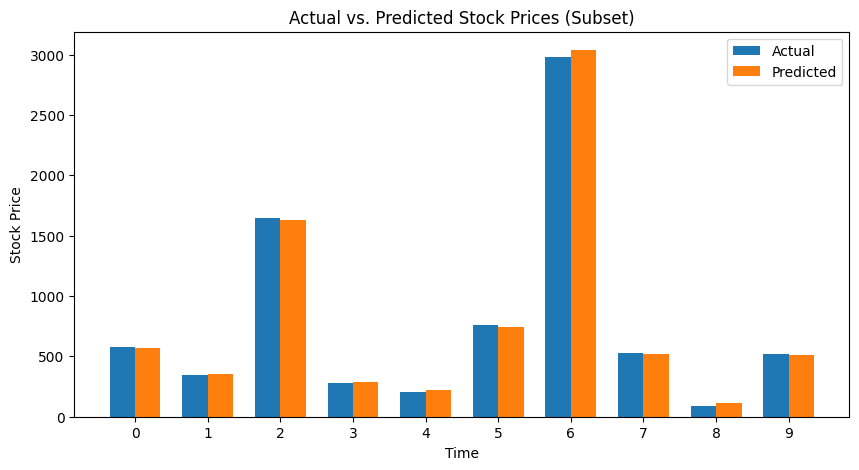

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Select a subset of data to plot (e.g., first 10 data points)
subset_size = 10
indices = np.arange(subset_size)

# Plot actual vs. predicted stock prices for the subset using a bar graph
plt.figure(figsize=(10, 5))
bar_width = 0.35
plt.bar(indices, y_test_subset[:subset_size].flatten(), bar_width, label='Actual')
plt.bar(indices + bar_width, predictions_subset[:subset_size].flatten(), bar_width, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices (Subset)')
plt.xticks(indices + bar_width / 2, indices)
plt.legend()
plt.show()
